In [1]:
suppressPackageStartupMessages(library(ATACseqQC))
suppressPackageStartupMessages(library(Rsamtools))
suppressPackageStartupMessages(library(EnsDb.Hsapiens.v86))
suppressPackageStartupMessages(library(ChIPpeakAnno))
suppressPackageStartupMessages(library(encodeChIPqc))

source(system.file("extdata", "IGVSnapshot.R", package = "ATACseqQC"))

In [2]:
atac_folder = "data/ATAC-Seq/hiPSCCM-ERRagKO/aligned"
atac_shifted_folder = file.path(atac_folder, "shifted")
pics_folder = "pics/atac/QC"

dir.create(pics_folder, showWarnings = F)
dir.create(atac_shifted_folder, showWarnings = F)

In [3]:
bam_file = file.path(atac_folder, "Cont1_ATAC_v2_1.bam")
bam_label = "Cont1_1"

In [28]:
file_pbc1 = list()
for(file in list.files("data/ATAC-Seq/hiPSCCM-ERRagKO/aligned/qc_tmp/", pattern = "bam$", full.names = T)) {
    file_pbc1[[file]] = PBC(file)
}

In [35]:
lines = NULL
for(name in names(file_pbc1))
    lines = c(lines, paste0(name, "\t", file_pbc1[[name]]))

writeLines(lines, "data/ATAC-Seq/hiPSCCM-ERRagKO/aligned/qc_tmp/pbc1.tsv")

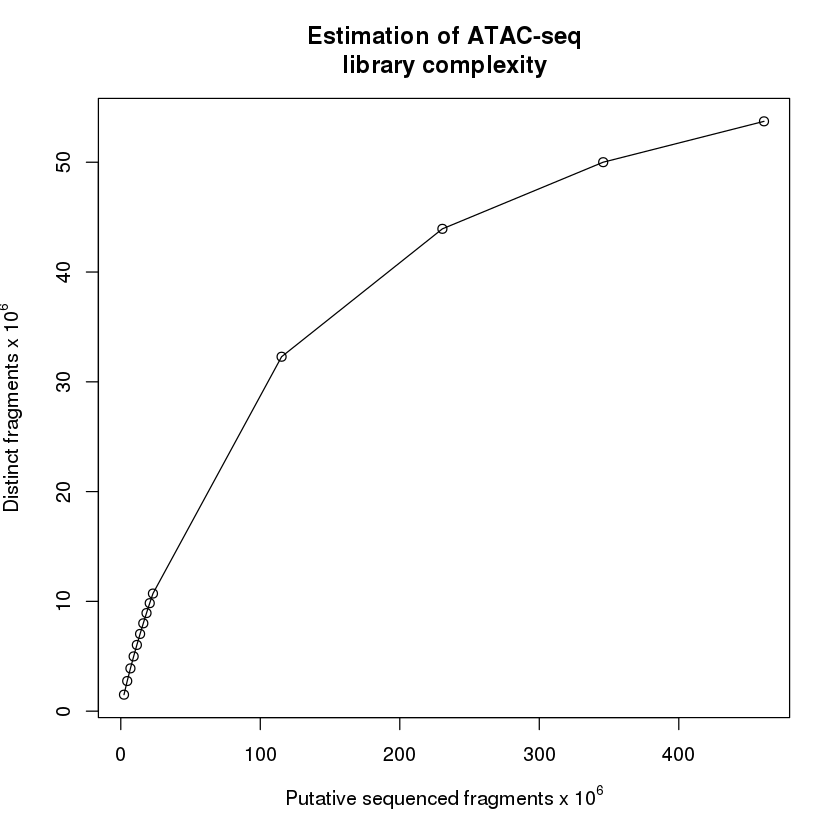

In [8]:
estimateLibComplexity(readsDupFreq(bam_file))

In [3]:
for(sample in c("Cont", "KO1-", "KO6-"))
    for(rep in c(1, 2)) 
        for(trep in c(1, 2)) {
            bam_label = paste0(sample, rep, "_", trep)  
            bam_file = file.path(atac_folder, paste0(sample, rep, "_ATAC_v2_", trep, ".bam"))
            #png(file.path(pics_folder, paste0(bam_label, "_fragment_size_distribution.png")), width = 2000, height = 2000, res = 300)
            pdf(file.path(pics_folder, paste0(bam_label, "_fragment_size_distribution.pdf")))
            frag_size = fragSizeDist(bam_file, bam_label)
            dev.off()
        }

In [19]:
possible_tag = combn(LETTERS, 2)
possible_tag = c(paste0(possible_tag[1, ], possible_tag[2, ]),
                 paste0(possible_tag[2, ], possible_tag[1, ]))

bam_top100 = scanBam(BamFile(bam_file, yieldSize = 100), param = ScanBamParam(tag = possible_tag))[[1]]$tag
tags = names(bam_top100)[lengths(bam_top100) == 100]
tags

[1] "AS" "MD" "XG" "NM" "XM" "XN" "XO" "XS" "YS" "YT"

In [14]:
txs = transcripts(EnsDb.Hsapiens.v86)

In [74]:
gal = readBamFile(bam_file, tag=tags, asMates=F, bigFile=TRUE)

In [20]:
gal = readBamFile(bam_file, tag=tags, asMates=F, bigFile=T)

In [ ]:
tsse <- TSSEscore(gal, txs)
summary(tsse$TSS.enrichment.score)

In [ ]:
txs = txs[seqnames(txs) %in% "chr1"]
genome = Hsapiens
## split the reads into NucleosomeFree, mononucleosome, 
## dinucleosome and trinucleosome.
## and save the binned alignments into bam files.
objs = splitGAlignmentsByCut(gal1, txs=txs, genome=genome, outPath = outPath,
                              conservation=phastCons100way.UCSC.hg19)

In [ ]:
library(AnnotationHub)
ah <- AnnotationHub()

In [49]:
grs <- query(ah, c("ensembl"))
grs

AnnotationHub with 15126 records
# snapshotDate(): 2019-10-29 
# $dataprovider: Ensembl, UCSC, BioMart, ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/
# $species: Mus musculus, Sus scrofa, Oryzias latipes, Homo sapiens, Rattus ...
# $rdataclass: TwoBitFile, GRanges, EnsDb, data.frame, OrgDb, list
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH5046"]]' 

            title                                                              
  AH5046  | Ensembl Genes                                                      
  AH5160  | Ensembl Genes                                                      
  AH5311  | Ensembl Genes                                                      
  AH5434  | Ensembl Genes                                                      
  AH5435  | Ensembl EST Genes                                                  
  ...      

In [45]:
ah["AH75192"]$sourceurl

[1] "ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_32/gencode.v32.annotation.gtf.gz"

In [54]:
seqlevelsStyle(TxDb.Hsapiens.UCSC.hg38.knownGene)

[1] "UCSC"

In [66]:
seqlevelsStyle(EnsDb.Hsapiens.v86)

[1] "Ensembl"